# **Практическая работа №10. Анализ и сегментация клиентов с помощью алгоритмов кластеризации**

### **Цель работы:**

Разработать систему сегментации клиентов для розничной компании с использованием алгоритмов кластеризации. Это позволит компании лучше понимать своих клиентов, персонализировать маркетинговые кампании и оптимизировать бизнес-процессы.

### **Введение:**

Розничные компании сталкиваются с большим объемом данных о своих клиентах, включая историю покупок, демографическую информацию и поведенческие характеристики. Однако без должного анализа эти данные остаются неиспользованными. Сегментация клиентов позволяет выделить группы с общими характеристиками, чтобы более эффективно таргетировать предложения и улучшить удовлетворенность клиентов.



### **Задачи:**

1. **Сбор и анализ данных о клиентах.**
2. **Предобработка и подготовка данных для моделирования.**
3. **Применение различных алгоритмов кластеризации для сегментации клиентов.**
4. **Оценка качества кластеризации с использованием внутренних и внешних метрик.**
5. **Интерпретация и визуализация результатов.**
6. **Формирование рекомендаций для бизнес-стратегии компании на основе полученных сегментов.**



### **Пошаговое описание рабочего процесса (пайплайна):**

#### **Шаг 1: Сбор и анализ данных**

**1.1. Выбор набора данных:**

- Используйте датасет "Online Retail II" из [UCI Machine Learning Repository](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci) или другой открытый набор данных, содержащий информацию о транзакциях клиентов.
- Данные должны включать:
  - Идентификаторы клиентов.
  - Информацию о покупках (товары, количество, стоимость).
  - Дату и время транзакций.
  - Демографические данные (если доступны): возраст, пол, локация и т.д.

**1.2. Первичный анализ данных (EDA):**

- Изучите структуру данных и их распределение.
- Определите основные характеристики данных:
  - Общий объем продаж.
  - Частота покупок по клиентам.
  - Распределение выручки по товарам.
- Выявите тенденции и аномалии.

In [1]:
import pandas as pd

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url)
data = data.sample(n=50000, random_state=1)
# Просмотр первых строк данных
print(data.head())


       InvoiceNo StockCode                      Description  Quantity  \
94801    C544414     22960         JAM MAKING SET WITH JARS        -2   
210111    555276     48111            DOORMAT 3 SMILEY CATS         1   
455946    575656     22952  60 CAKE CASES VINTAGE CHRISTMAS        48   
403542    571636     20674              GREEN POLKADOT BOWL        16   
471951    576657     22556   PLASTERS IN TIN CIRCUS PARADE         12   

               InvoiceDate  UnitPrice  CustomerID         Country  
94801  2011-02-18 14:54:00       3.75     13408.0  United Kingdom  
210111 2011-06-01 17:28:00      15.79         NaN  United Kingdom  
455946 2011-11-10 14:29:00       0.55     13319.0  United Kingdom  
403542 2011-10-18 11:41:00       1.25     13509.0  United Kingdom  
471951 2011-11-16 11:03:00       1.65     12720.0         Germany  


In [2]:
# Просмотр структуры данных
print(data.info())

# Просмотр статистики данных
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 94801 to 76672
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    50000 non-null  object        
 1   StockCode    50000 non-null  object        
 2   Description  49868 non-null  object        
 3   Quantity     50000 non-null  int64         
 4   InvoiceDate  50000 non-null  datetime64[ns]
 5   UnitPrice    50000 non-null  float64       
 6   CustomerID   37505 non-null  float64       
 7   Country      50000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.4+ MB
None
           Quantity                    InvoiceDate     UnitPrice    CustomerID
count  50000.000000                          50000  50000.000000  37505.000000
mean       9.269540  2011-07-04 08:50:26.787599872      4.298736  15287.088868
min    -9600.000000            2010-12-01 08:28:00      0.000000  12347.000000
2

In [3]:
# Общий объем продаж
total_sales = data['Quantity'] * data['UnitPrice']
print(f"Общий объем продаж: {total_sales.sum():.2f}")


Общий объем продаж: 895454.07


In [4]:
# Частота покупок по клиентам
customer_purchase_frequency = data['CustomerID'].value_counts()
print(customer_purchase_frequency.head())


CustomerID
17841.0    723
14911.0    550
14096.0    487
12748.0    401
14606.0    252
Name: count, dtype: int64


In [5]:
# Распределение выручки по товарам
item_revenue = data.groupby('Description')['Quantity'].sum() * data.groupby('Description')['UnitPrice'].mean()
print(item_revenue.sort_values(ascending=False).head())


Description
DOTCOM POSTAGE                        24595.370000
Manual                                21888.332889
REGENCY CAKESTAND 3 TIER              16844.074913
WHITE HANGING HEART T-LIGHT HOLDER    14464.392490
PARTY BUNTING                          9271.612025
dtype: float64


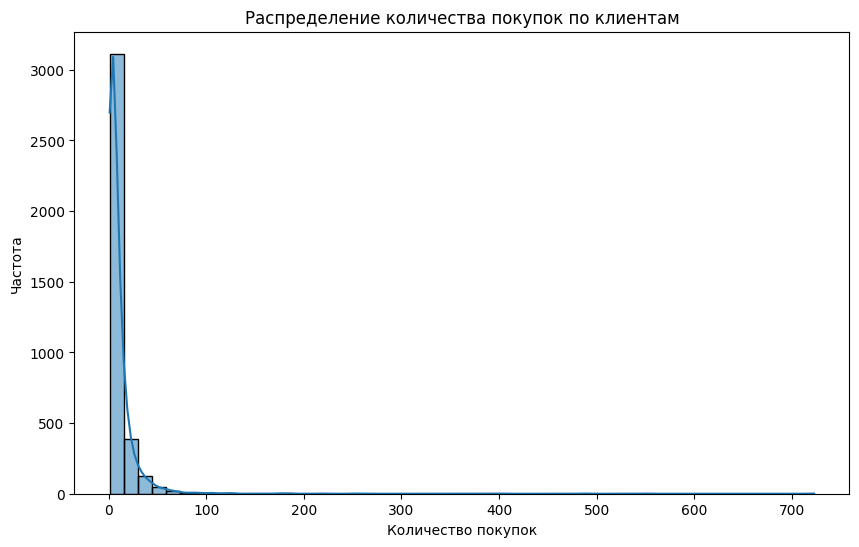

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# График распределения количества покупок по клиентам
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase_frequency.values, bins=50, kde=True)
plt.title('Распределение количества покупок по клиентам')
plt.xlabel('Количество покупок')
plt.ylabel('Частота')
plt.show()


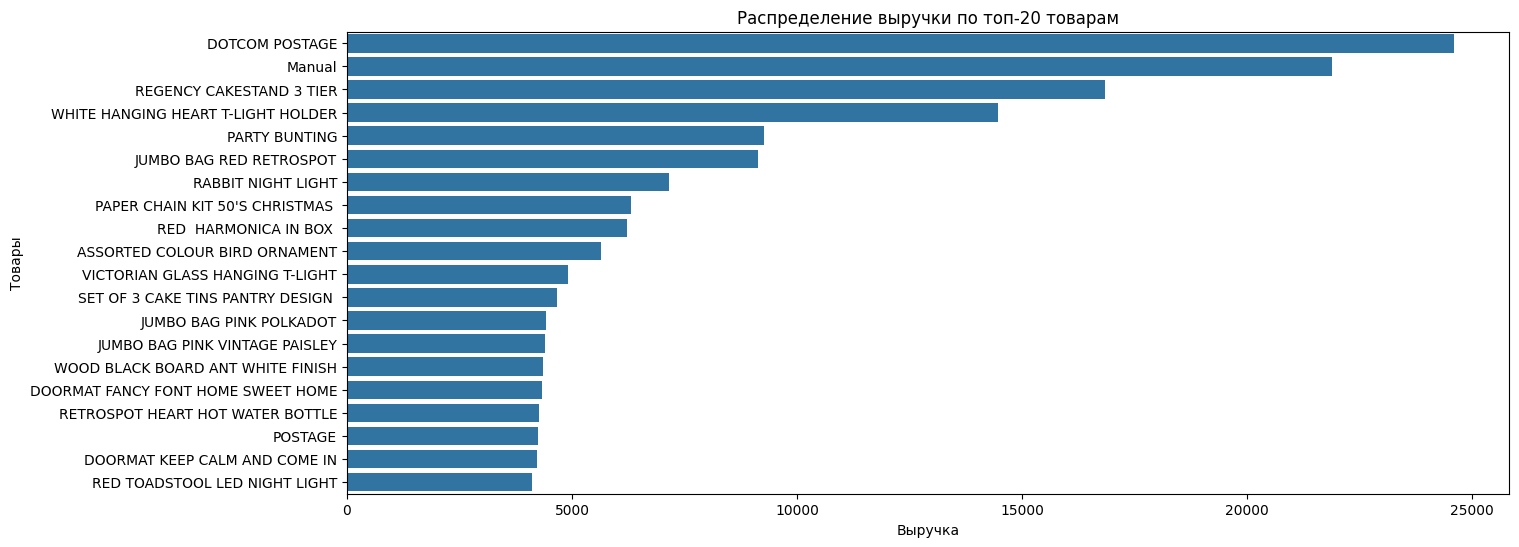

In [7]:
top_n = 20
top_items = item_revenue.sort_values(ascending=False).head(top_n)

plt.figure(figsize=(15, 6))
sns.barplot(x=top_items.values, y=top_items.index, orient='h')
plt.title(f'Распределение выручки по топ-{top_n} товарам')
plt.xlabel('Выручка')
plt.ylabel('Товары')
plt.show()


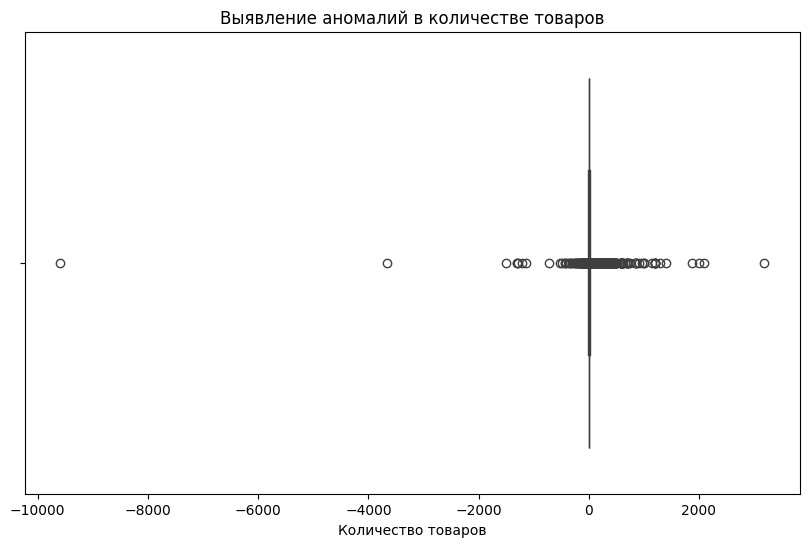

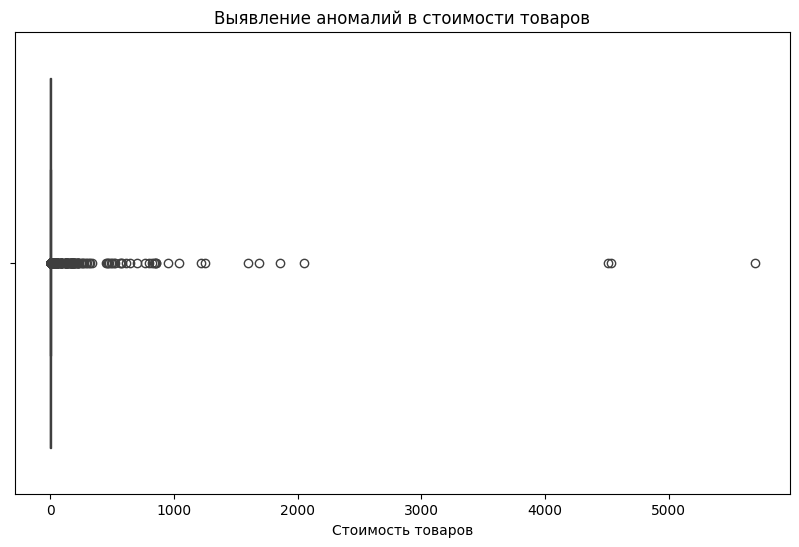

In [8]:
# Выявление аномалий в данных
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Quantity'])
plt.title('Выявление аномалий в количестве товаров')
plt.xlabel('Количество товаров')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['UnitPrice'])
plt.title('Выявление аномалий в стоимости товаров')
plt.xlabel('Стоимость товаров')
plt.show()


#### **Шаг 2: Предобработка данных**

**2.1. Работа с пропущенными значениями:**

- Проанализируйте наличие пропущенных данных.
- Решите, как справиться с ними:
  - Удаление строк/столбцов с пропущенными значениями.
  - Заполнение пропущенных значений средним, медианой или наиболее частым значением.

**2.2. Обработка выбросов:**

- Выявите выбросы в данных (например, аномально большие заказы).
- Решите, следует ли их удалить или обработать иным образом.

**2.3. Создание новых признаков:**

- Рассчитайте Recency, Frequency, Monetary Value (RFM-анализ):
  - **Recency (давность):** Время с момента последней покупки.
  - **Frequency (частота):** Количество покупок за определенный период.
  - **Monetary (сумма):** Общая сумма покупок.
- Создайте дополнительные признаки, такие как средний чек, предпочтительные категории товаров и т.д.

**2.4. Нормализация и масштабирование:**

- Примените стандартизацию или нормализацию к числовым признакам для приведения их к единому масштабу.
- Объясните выбор метода масштабирования.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [10]:
# Проверка наличия пропущенных значений
missing_data = data.isnull().sum()
print(missing_data)

# Удаление строк с пропущенными значениями в ключевых столбцах
data = data.dropna(subset=['CustomerID', 'Description', 'Quantity', 'UnitPrice'])



InvoiceNo          0
StockCode          0
Description      132
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     12495
Country            0
dtype: int64


C:\Temp\ipykernel_11692\562880281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CustomerID'].fillna(data['CustomerID'].mode()[0], inplace=True)
C:\Temp\ipykernel_11692\562880281.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

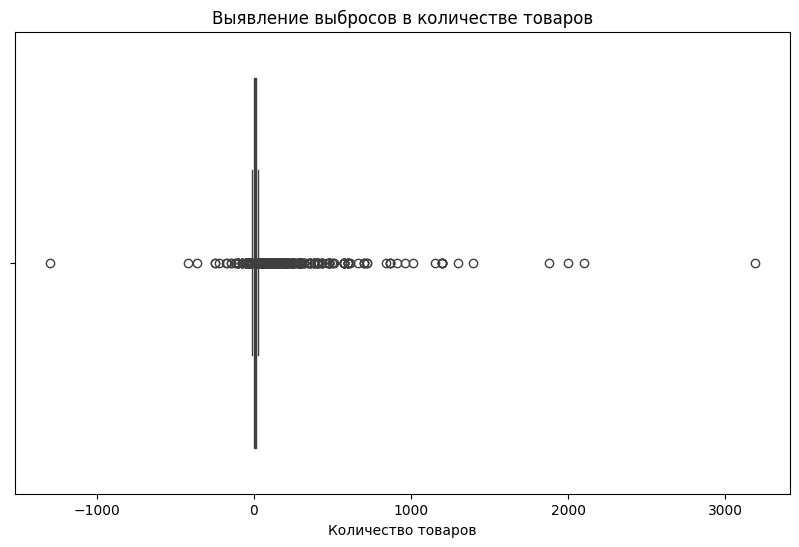

In [11]:
# Заполнение пропущенных значений в столбце 'CustomerID' наиболее частым значением
data['CustomerID'].fillna(data['CustomerID'].mode()[0], inplace=True)

# Заполнение пропущенных значений в столбце 'Description' наиболее частым значением
data['Description'].fillna(data['Description'].mode()[0], inplace=True)

# Заполнение пропущенных значений в столбце 'Quantity' медианой
data['Quantity'].fillna(data['Quantity'].median(), inplace=True)

# Заполнение пропущенных значений в столбце 'UnitPrice' медианой
data['UnitPrice'].fillna(data['UnitPrice'].median(), inplace=True)

# Визуализация выбросов в количестве товаров
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Quantity'])
plt.title('Выявление выбросов в количестве товаров')
plt.xlabel('Количество товаров')
plt.show()


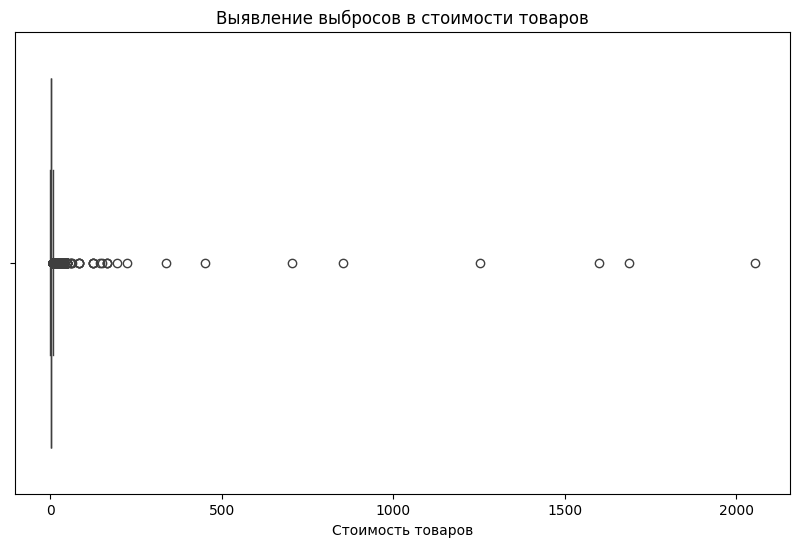

In [12]:

# Визуализация выбросов в стоимости товаров
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['UnitPrice'])
plt.title('Выявление выбросов в стоимости товаров')
plt.xlabel('Стоимость товаров')
plt.show()



In [13]:
# Удаление выбросов в количестве товаров
Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Quantity'] < (Q1 - 1.5 * IQR)) | (data['Quantity'] > (Q3 + 1.5 * IQR)))]

# Удаление выбросов в стоимости товаров
Q1 = data['UnitPrice'].quantile(0.25)
Q3 = data['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['UnitPrice'] < (Q1 - 1.5 * IQR)) | (data['UnitPrice'] > (Q3 + 1.5 * IQR)))]


In [14]:
# Преобразование даты в формат datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Расчет Recency (давность)
current_date = data['InvoiceDate'].max()
data['Recency'] = (current_date - data['InvoiceDate']).dt.days

# Расчет Frequency (частота)
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'TotalFrequency']
data = data.merge(frequency, on='CustomerID', how='left')

# Расчет Monetary (сумма)
data['Monetary'] = data['Quantity'] * data['UnitPrice']
monetary = data.groupby('CustomerID')['Monetary'].sum().reset_index()
monetary.columns = ['CustomerID', 'TotalMonetary']  # Переименование столбца
data = data.merge(monetary, on='CustomerID', how='left')

# Расчет среднего чека
data['AvgCheck'] = data['TotalMonetary'] / data['TotalFrequency']


In [15]:
# Расчет предпочтительных категорий товаров (пример)
preferred_categories = data.groupby('CustomerID')['Description'].value_counts().reset_index()
preferred_categories.columns = ['CustomerID', 'Description', 'Count']
preferred_categories = preferred_categories.sort_values(by=['CustomerID', 'Count'], ascending=False).drop_duplicates(subset=['CustomerID'])
data = data.merge(preferred_categories, on=['CustomerID', 'Description'], how='left')

# Выбор числовых признаков для стандартизации
numeric_features = ['Recency', 'TotalFrequency', 'Monetary', 'AvgCheck']

# Применение стандартизации
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

#### **Шаг 3: Применение алгоритмов кластеризации**

**3.1. Выбор алгоритмов:**

- **K-средних (K-Means):** Для разбиения данных на k кластеров на основе эврестического подхода.
- **Иерархическая кластеризация:** Для выявления вложенной структуры кластеров.
- **DBSCAN и OPTICS:** Для обнаружения кластеров произвольной формы и выявления выбросов.

**3.2. Определение оптимального количества кластеров:**

- Для K-Means и иерархической кластеризации используйте:
  - **Метод локтя (Elbow Method):** Постройте график зависимости суммы квадратов внутрикластерных расстояний от числа кластеров.
  - **Коэффициент силуэта:** Рассчитайте для различных значений k и выберите оптимальное.

**3.3. Применение алгоритмов:**

- Запустите каждый алгоритм на подготовленных данных.
- Сохраняйте результаты кластеризации для последующего анализа.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Определение оптимального количества кластеров для K-Means с помощью метода локтя
sse = []
k_range = range(2, 11)  # Начинаем с 2 кластеров
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[numeric_features])
    sse.append(kmeans.inertia_)


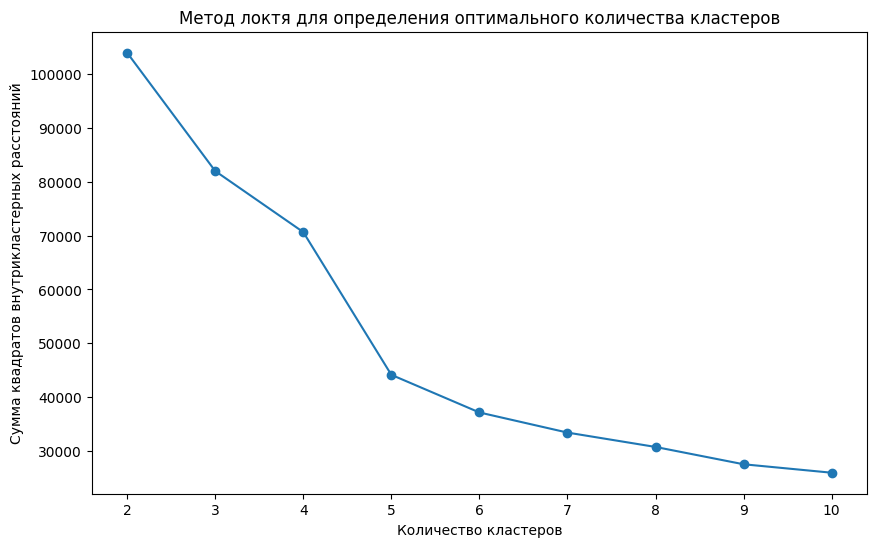

In [17]:

# Построение графика метода локтя
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов внутрикластерных расстояний')
plt.show()



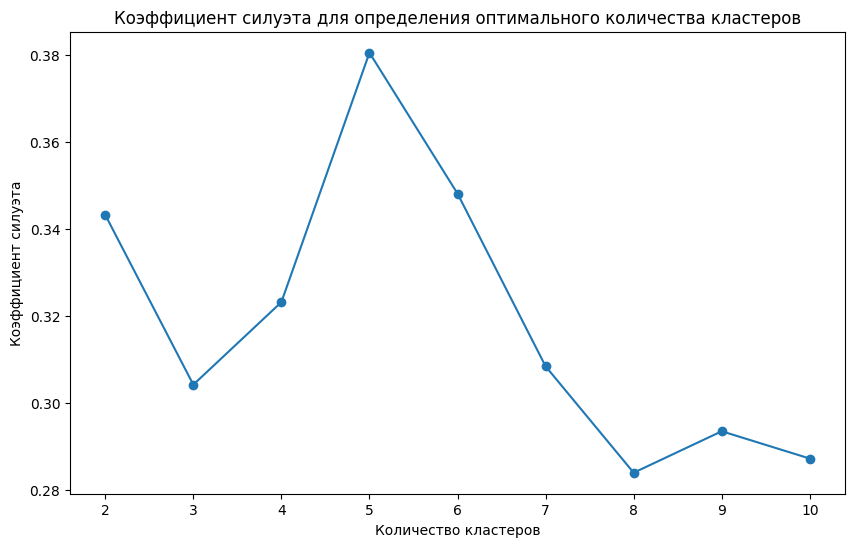

In [18]:
# Определение оптимального количества кластеров для K-Means с помощью коэффициента силуэта
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data[numeric_features])
    silhouette_avg = silhouette_score(data[numeric_features], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Построение графика коэффициента силуэта
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта для определения оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.show()



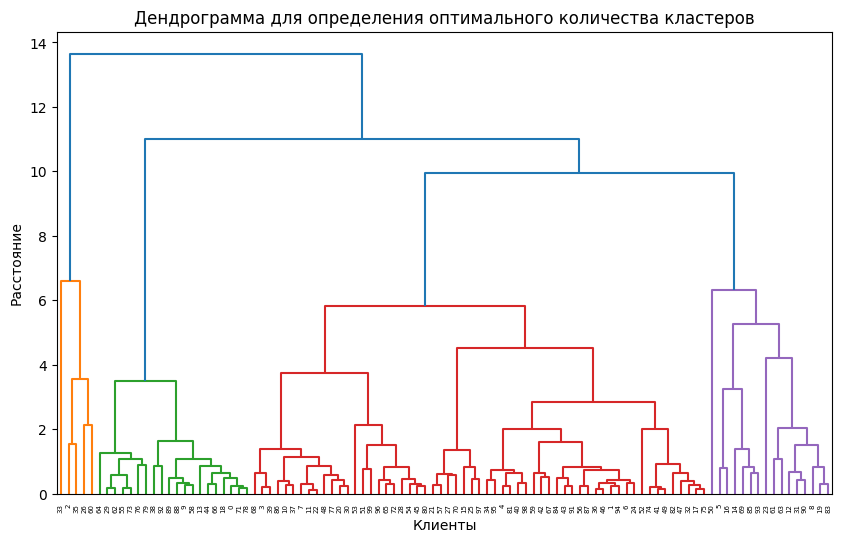

In [19]:
# Применение K-Means с оптимальным количеством кластеров
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(data[numeric_features])
data['KMeans_Cluster'] = cluster_labels

# Использование подвыборки данных для построения дендрограммы
sample_size = 100  # Размер подвыборки
sample_data = data[numeric_features].sample(n=sample_size, random_state=42)

# Построение дендрограммы для подвыборки данных
Z = linkage(sample_data, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Дендрограмма для определения оптимального количества кластеров')
plt.xlabel('Клиенты')
plt.ylabel('Расстояние')
plt.show()



In [20]:
# Использование подвыборки данных для применения иерархической кластеризации
sample_data = data[numeric_features].sample(n=sample_size, random_state=42)

# Применение иерархической кластеризации с оптимальным количеством кластеров
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
cluster_labels = hierarchical_clustering.fit_predict(sample_data)
data.loc[sample_data.index, 'Hierarchical_Cluster'] = cluster_labels

# Применение DBSCAN с различными параметрами на подвыборке данных
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(sample_data)
        unique_labels = set(cluster_labels)
        if len(unique_labels) > 1:  # Проверка на наличие более одного кластера
            data.loc[sample_data.index, f'DBSCAN_Cluster_eps{eps}_min{min_samples}'] = cluster_labels
            print(f'DBSCAN with eps={eps} and min_samples={min_samples} found {len(unique_labels)} clusters')
            break

# Сохранение результатов кластеризации в отдельный файл
data.to_excel('clustered_data.xlsx', index=False)

DBSCAN with eps=0.3 and min_samples=5 found 3 clusters
DBSCAN with eps=0.4 and min_samples=5 found 5 clusters
DBSCAN with eps=0.5 and min_samples=5 found 3 clusters


#### **Шаг 4: Оценка качества кластеризации**

**4.1. Внутренние метрики:**

- **Коэффициент силуэта:** Оцените, насколько хорошо объекты расположены внутри кластеров.
- **Индекс Дэвиса-Болдина:** Оцените уровень разделимости кластеров.
- **Индекс Калинского-Харабаза:** Оцените соотношение межкластерной дисперсии к внутрикластерной.

**4.2. Внешние метрики (если доступны истинные метки):**

- **Adjusted Rand Index (ARI):** Сравните полученные кластеры с известными категориями клиентов.
- **Normalized Mutual Information (NMI):** Измерьте общую информацию между распределениями.

**4.3. Сравнение алгоритмов:**

- Составьте таблицу со значениями метрик для каждого алгоритма.
- Определите, какой алгоритм показал наилучшие результаты и почему.

In [21]:
!pip install hdbscan

In [22]:
import numpy as np
# ограничеваем
df = data.head(50000)
indices = df.index.to_numpy().reshape(-1, 1)  # Индексы
values = df['Quantity'].to_numpy().reshape(-1, 1)  # Значения
new_X = np.hstack((indices, values))

#values2 =  df['UnitPrice'].to_numpy().reshape(-1, 1)  # Значения
#new_Y = np.hstack((indices, values2))

In [23]:
values2 = df['UnitPrice'].to_numpy()
values2

array([3.75, 1.25, 1.65, ..., 2.55, 1.95, 1.25])

In [29]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (
    adjusted_rand_score,
    v_measure_score,
    normalized_mutual_info_score,
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)
from sklearn.preprocessing import StandardScaler
import hdbscan
from scipy.spatial.distance import cdist, pdist

# Загрузка набора данных

X= new_X
y_true = values2

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=3)
y_dbscan = dbscan.fit_predict(X_scaled)

# Кластеризация с помощью HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=3)
y_hdbscan = hdbscan_clusterer.fit_predict(X_scaled)

# Функция для вычисления индекса Дунна
def dunn_index(X, labels):
    labels = np.array(labels)
    mask = labels != -1  # исключаем шумовые точки
    X = X[mask]
    labels = labels[mask]

    unique_clusters = np.unique(labels)
    clusters = [X[labels == label] for label in unique_clusters]

    # Межкластерные расстояния
    min_intercluster = np.inf
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dist = np.min(cdist(clusters[i], clusters[j]))
            if dist < min_intercluster:
                min_intercluster = dist

    # Внутрикластерные расстояния
    max_intracluster = 0
    for cluster in clusters:
        if len(cluster) > 1:
            dist = np.max(pdist(cluster))
            if dist > max_intracluster:
                max_intracluster = dist

    if max_intracluster == 0 or np.isinf(min_intercluster):
        return np.nan
    else:
        return min_intercluster / max_intracluster



c:\Users\Митрандир\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\Митрандир\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\Митрандир\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\Митрандир\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering m

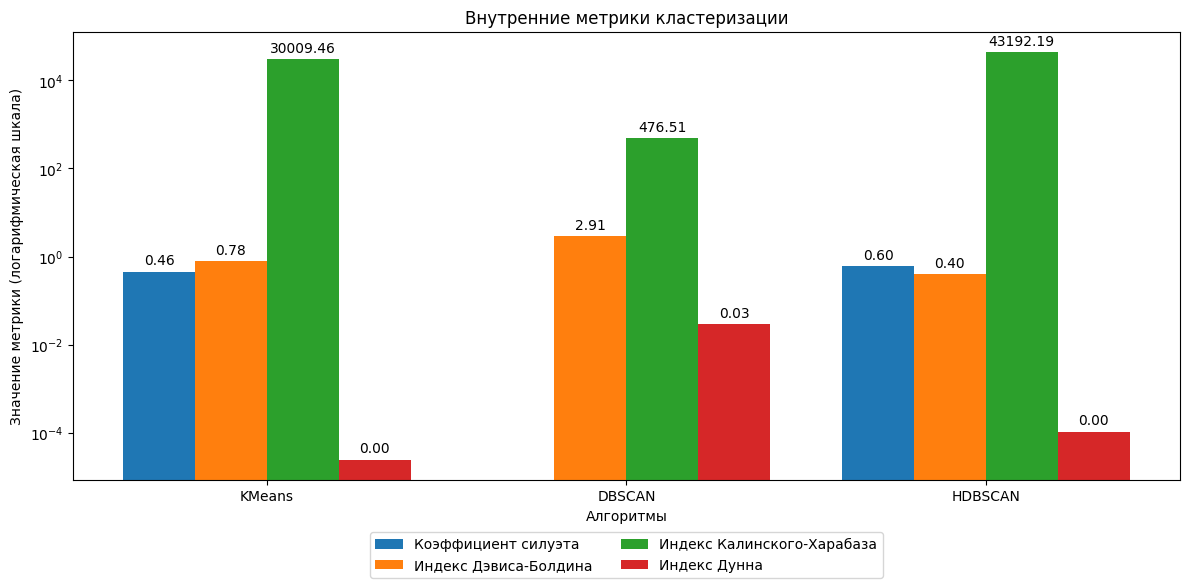

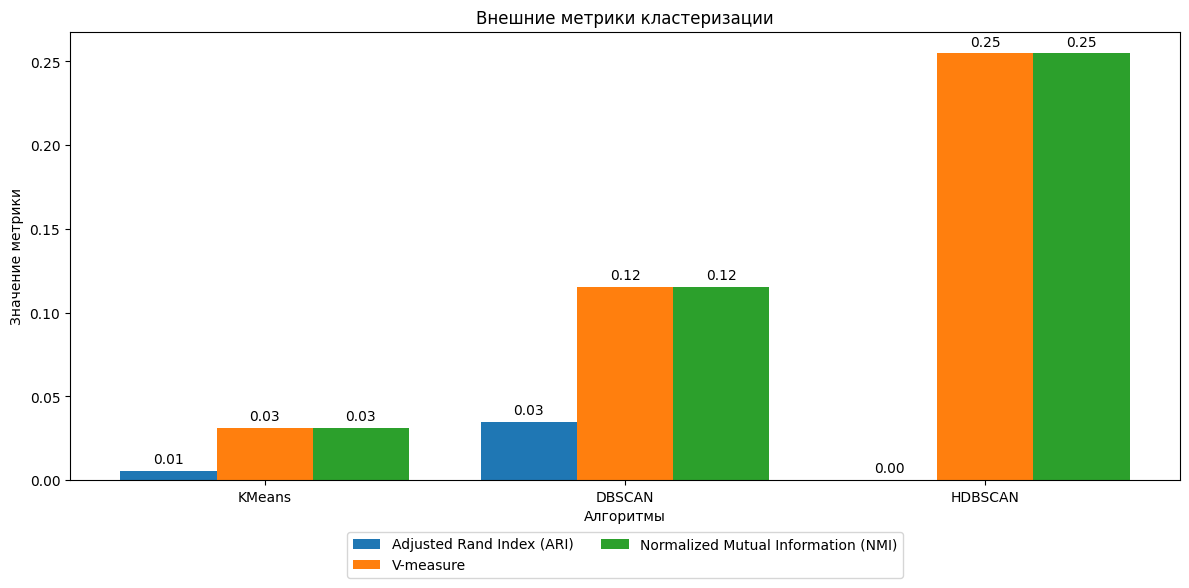

In [30]:
# Функции для вычисления метрик
def compute_internal_metrics(X, labels):
    mask = labels != -1  # исключаем шумовые точки
    X_masked = X[mask]
    labels_masked = labels[mask]
    if len(np.unique(labels_masked)) > 1 and len(X_masked) > 0:
        silhouette = silhouette_score(X_masked, labels_masked)
        calinski_harabasz = calinski_harabasz_score(X_masked, labels_masked)
        davies_bouldin = davies_bouldin_score(X_masked, labels_masked)
        dunn = dunn_index(X, labels)
    else:
        silhouette = np.nan
        calinski_harabasz = np.nan
        davies_bouldin = np.nan
        dunn = np.nan
    return {
        'Коэффициент силуэта': silhouette,
        'Индекс Дэвиса-Болдина': davies_bouldin,
        'Индекс Калинского-Харабаза': calinski_harabasz,
        'Индекс Дунна': dunn
    }

def compute_external_metrics(y_true, y_pred):
    mask = y_pred != -1  # исключаем шумовые точки
    y_true_masked = y_true[mask]
    y_pred_masked = y_pred[mask]
    if len(np.unique(y_pred_masked)) > 1 and len(y_true_masked) > 0:
        ari = adjusted_rand_score(y_true_masked, y_pred_masked)
        v_measure = v_measure_score(y_true_masked, y_pred_masked)
        nmi = normalized_mutual_info_score(y_true_masked, y_pred_masked)
    else:
        ari = np.nan
        v_measure = np.nan
        nmi = np.nan
    return {
        'Adjusted Rand Index (ARI)': ari,
        'V-measure': v_measure,
        'Normalized Mutual Information (NMI)': nmi
    }

# Вычисление метрик для каждого алгоритма
metrics_results = {}

# KMeans
metrics_results['KMeans'] = {}
metrics_results['KMeans']['Внутренние'] = compute_internal_metrics(X_scaled, y_kmeans)
metrics_results['KMeans']['Внешние'] = compute_external_metrics(y_true, y_kmeans)

# DBSCAN
metrics_results['DBSCAN'] = {}
metrics_results['DBSCAN']['Внутренние'] = compute_internal_metrics(X_scaled, y_dbscan)
metrics_results['DBSCAN']['Внешние'] = compute_external_metrics(y_true, y_dbscan)

# HDBSCAN
metrics_results['HDBSCAN'] = {}
metrics_results['HDBSCAN']['Внутренние'] = compute_internal_metrics(X_scaled, y_hdbscan)
metrics_results['HDBSCAN']['Внешние'] = compute_external_metrics(y_true, y_hdbscan)

# Подготовка данных для визуализации
internal_metrics = ['Коэффициент силуэта', 'Индекс Дэвиса-Болдина', 'Индекс Калинского-Харабаза', 'Индекс Дунна']
external_metrics = ['Adjusted Rand Index (ARI)', 'V-measure', 'Normalized Mutual Information (NMI)']
algorithms = ['KMeans', 'DBSCAN', 'HDBSCAN']

# Подготовка данных для графиков
def collect_metrics(metrics_dict, metric_names, metric_type):
    data = {}
    for metric in metric_names:
        values = []
        for algo in algorithms:
            value = metrics_dict[algo][metric_type].get(metric)
            values.append(value)
        data[metric] = values
    return data

internal_data = collect_metrics(metrics_results, internal_metrics, 'Внутренние')
external_data = collect_metrics(metrics_results, external_metrics, 'Внешние')

# Функция для построения графиков
def plot_metrics(data, title, is_internal=False):
    x = np.arange(len(algorithms))
    total_width = 0.8  # Общая ширина всех столбцов для одного алгоритма
    num_metrics = len(data)
    width = total_width / num_metrics  # Ширина одного столбца
    offsets = np.linspace(-total_width/2 + width/2, total_width/2 - width/2, num_metrics)

    fig, ax = plt.subplots(figsize=(12, 6))

    for idx, (attribute, measurement) in enumerate(data.items()):
        rects = ax.bar(x + offsets[idx], measurement, width, label=attribute)

        # Добавление меток над столбцами
        for rect in rects:
            height = rect.get_height()
            if not np.isnan(height):
                ax.annotate(f'{height:.2f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom')

    ax.set_xlabel('Алгоритмы')
    ax.set_ylabel('Значение метрики')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(algorithms)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

    # Если это внутренние метрики, используем логарифмический масштаб по оси Y
    if is_internal:
        ax.set_yscale('log')
        ax.set_ylabel('Значение метрики (логарифмическая шкала)')

    plt.tight_layout()
    plt.show()

# Построение графиков
plot_metrics(internal_data, 'Внутренние метрики кластеризации', is_internal=True)
plot_metrics(external_data, 'Внешние метрики кластеризации')

#### **Шаг 5: Интерпретация и визуализация результатов**

**5.1. Визуализация кластеров:**

- **Снижение размерности:** Примените PCA или t-SNE для отображения данных в 2D или 3D пространстве.
- **Постройте графики:**
  - Рассеивания с цветовой кодировкой кластеров.
  - Дендрограммы для иерархической кластеризации.
- **Визуализация признаков:**
  - Постройте боксплоты, гистограммы или тепловые карты для сравнения признаков между кластерами.

**5.2. Описание сегментов:**

- Для каждого кластера опишите характерные черты:
  - Средние значения признаков.
  - Поведенческие особенности (например, частота покупок, средний чек).
  - Демографические характеристики (если доступны).
- Присвойте сегментам осмысленные названия (например, "Лояльные клиенты", "Покупатели со сниженной активностью", "Большие транзакции").

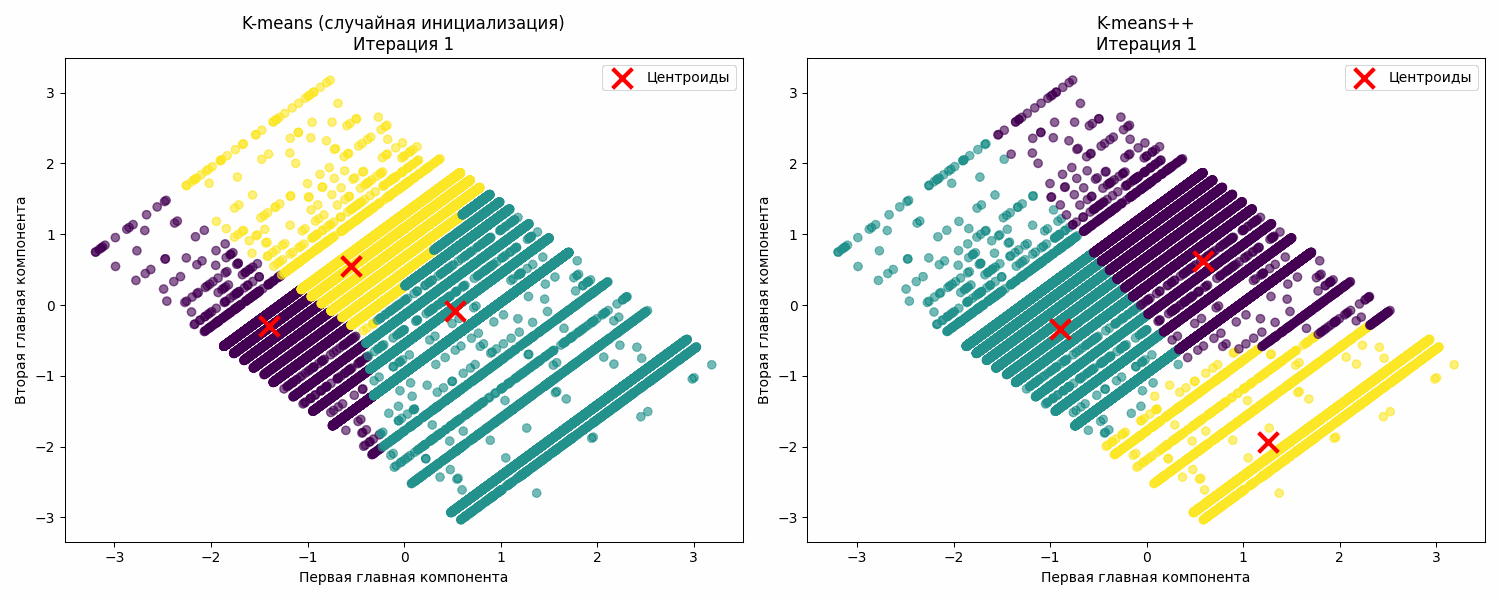

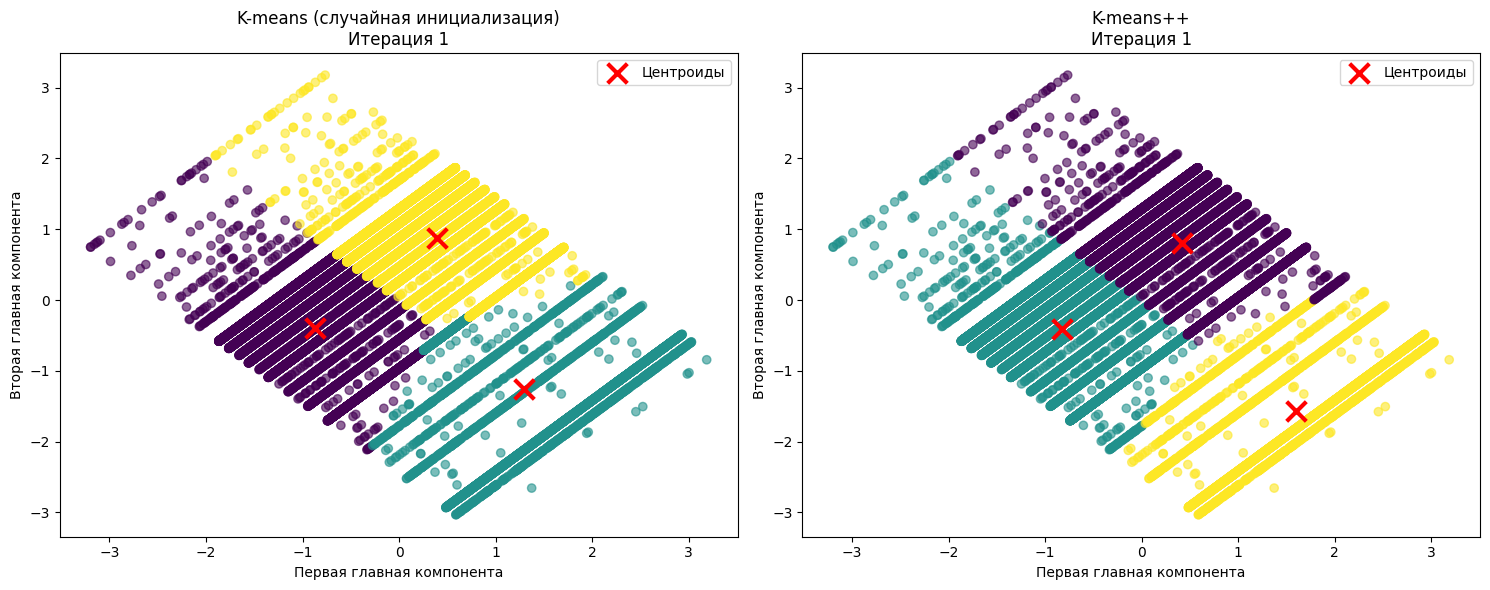

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.animation as animation
from IPython.display import HTML



# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Уменьшение размерности для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

def calculate_distances(X, centroids):
    """Вычисление расстояний от точек до центроидов"""
    distances = np.zeros((len(centroids), len(X)))
    for i, centroid in enumerate(centroids):
        distances[i] = np.sum((X - centroid) ** 2, axis=1)
    return distances

def kmeans_single_iteration(X, centroids):
    """Одна итерация K-means"""
    # Вычисление расстояний
    distances = calculate_distances(X, centroids)

    # Назначение точек ближайшим центроидам
    labels = np.argmin(distances, axis=0)

    # Обновление центроидов
    new_centroids = np.array([
        X[labels == k].mean(axis=0) if np.sum(labels == k) > 0
        else centroids[k]
        for k in range(len(centroids))
    ])

    return labels, new_centroids

def random_init(X, n_clusters):
    """Случайная инициализация центроидов"""
    n_samples = X.shape[0]
    indices = np.random.permutation(n_samples)[:n_clusters]
    return X[indices]

def kmeans_plus_plus_init(X, n_clusters):
    """Инициализация центроидов методом K-means++"""
    n_samples = X.shape[0]

    # Выбор первого центроида случайным образом
    centroids = [X[np.random.randint(n_samples)]]

    # Выбор остальных центроидов
    for _ in range(1, n_clusters):
        # Вычисление расстояний до ближайших центроидов
        distances = calculate_distances(X, centroids)
        min_distances = np.min(distances, axis=0)

        # Выбор следующего центроида с вероятностью, пропорциональной D²
        probabilities = min_distances / min_distances.sum()
        cumulative_probs = np.cumsum(probabilities)
        r = np.random.random()

        for j, p in enumerate(cumulative_probs):
            if r <= p:
                centroids.append(X[j])
                break

    return np.array(centroids)

# Инициализация для анимации
n_clusters = 3
centroids_random = random_init(X_pca, n_clusters)
centroids_plus = kmeans_plus_plus_init(X_pca, n_clusters)

# Создание фигуры с двумя графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

def update(frame):
    """Функция обновления кадра анимации"""
    ax1.clear()
    ax2.clear()

    global centroids_random, centroids_plus

    # K-means с случайной инициализацией
    labels_random, new_centroids_random = kmeans_single_iteration(X_pca, centroids_random)
    scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_random, cmap='viridis', alpha=0.6)
    ax1.scatter(centroids_random[:, 0], centroids_random[:, 1], c='red', marker='x',
                s=200, linewidths=3, label='Центроиды')
    ax1.set_title(f'K-means (случайная инициализация)\nИтерация {frame + 1}')
    ax1.set_xlabel('Первая главная компонента')
    ax1.set_ylabel('Вторая главная компонента')
    ax1.legend()

    # K-means++
    labels_plus, new_centroids_plus = kmeans_single_iteration(X_pca, centroids_plus)
    scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_plus, cmap='viridis', alpha=0.6)
    ax2.scatter(centroids_plus[:, 0], centroids_plus[:, 1], c='red', marker='x',
                s=200, linewidths=3, label='Центроиды')
    ax2.set_title(f'K-means++\nИтерация {frame + 1}')
    ax2.set_xlabel('Первая главная компонента')
    ax2.set_ylabel('Вторая главная компонента')
    ax2.legend()

    # Обновление центроидов
    centroids_random = new_centroids_random
    centroids_plus = new_centroids_plus

    plt.tight_layout()
    return scatter1, scatter2

# Создание анимации
anim = animation.FuncAnimation(fig, update, frames=10, interval=500, blit=False)

# Сохранение анимации
anim.save('kmeans_comparison.gif', writer='pillow', fps=2, dpi=100)

# Отображение анимации в Colab
from IPython.display import Image
Image('kmeans_comparison.gif')

In [32]:
unique_values = data['Description'].unique()
unique_list = unique_values.tolist()

# Просмотр уникальных значений
print("\nУникальные значения для колонки 'column_name':")
print(unique_list)
unique_df = pd.DataFrame(unique_list, columns=['Unique Values'])

# Просмотр нового DataFrame
print("\nУникальные значения в вертикальной колонке:")
print(unique_df)


Уникальные значения для колонки 'column_name':
['JAM MAKING SET WITH JARS', 'GREEN POLKADOT BOWL', 'PLASTERS IN TIN CIRCUS PARADE ', 'SPOTTY BUNTING', 'SWEETHEART RECIPE BOOK STAND', 'WOODEN STAR CHRISTMAS SCANDINAVIAN', 'JAM JAR WITH PINK LID', 'WALL ART ONLY ONE PERSON ', 'LUNCH BAG SUKI DESIGN ', 'CRYSTAL PAIR HEART HAIR SLIDES', 'VINTAGE RED ENAMEL TRIM JUG ', 'PENNY FARTHING BIRTHDAY CARD', 'LUNCH BOX I LOVE LONDON', 'VICTORIAN GLASS HANGING T-LIGHT', 'SET OF 60 I LOVE LONDON CAKE CASES ', 'BLUE HAPPY BIRTHDAY BUNTING', 'COFFEE MUG APPLES DESIGN', 'CUPCAKE LACE PAPER SET 6', 'WHITE WIRE EGG HOLDER', 'BOX OF 24 COCKTAIL PARASOLS', 'RIBBON REEL MAKING SNOWMEN ', 'MINI PLAYING CARDS DOLLY GIRL ', 'GLASS JAR KINGS CHOICE', 'SET/6 FRUIT SALAD  PAPER PLATES', 'STOP FOR TEA WALL ART', 'CLASSIC CHROME BICYCLE BELL ', 'TRAVEL SEWING KIT', 'CHILDRENS APRON APPLES DESIGN', 'GARDENERS KNEELING PAD CUP OF TEA ', 'FAIRY SOAP SOAP HOLDER', 'DOG BOWL CHASING BALL DESIGN', '12 MESSAGE CARDS WITH 

In [33]:
import pandas as pd

# Пример DataFrame

df = pd.DataFrame(data)

# Преобразование колонки InvoiceDate в формат datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


# Нахождение самой маленькой даты
min_date = df['InvoiceDate'].min()

# Нахождение самой большой даты
max_date = df['InvoiceDate'].max()

# Просмотр результатов
print("\nСамая маленькая дата:", min_date)
print("Самая большая дата:", max_date)


Самая маленькая дата: 2010-12-01 08:28:00
Самая большая дата: 2011-12-09 12:50:00


#### **Шаг 6: Формирование бизнес-рекомендаций**

**6.1. Анализ потребностей каждого сегмента:**

- Определите потребности и предпочтения клиентов в каждом сегменте.
- Выявите возможности для увеличения продаж и улучшения сервиса.

**6.2. Разработка стратегий для каждого сегмента:**

- **Маркетинговые кампании:**
  - Персонализированные предложения.
  - Программы лояльности для удержания ценных клиентов.
- **Оптимизация продуктов:**
  - Расширение ассортимента для популярных сегментов.
  - Фокус на продуктах, интересных конкретным сегментам.

**6.3. Оценка потенциального влияния:**

- Оцените, как предложенные стратегии могут повысить выручку, удовлетворенность клиентов и другие ключевые показатели.

# <font color='red'>ВАШ ОТВЕТ</font>

#### **Шаг 7: Документирование и презентация результатов**

**7.1. Подготовка отчета:**

- **Введение:**
  - Описание цели работы и её значимости для бизнеса.
- **Методология:**
  - Подробное описание проведенных шагов.
- **Результаты:**
  - Представление метрик оценки и визуализаций.
  - Описание сегментов клиентов.
- **Обсуждение:**
  - Анализ полученных результатов.
  - Сравнение алгоритмов и обоснование выбора.
- **Рекомендации:**
  - Предложения по внедрению результатов в бизнес-процессы.
- **Заключение:**
  - Выводы о проделанной работе и её значимости.

**7.2. Презентация:**

- Подготовьте слайды для представления ключевых моментов работы.
- Используйте визуализации для иллюстрации результатов.
- Готовьтесь ответить на вопросы аудитории.

**7.3. Код и reproducibility:**

- Организуйте код в репозитории (например, GitHub) с понятной структурой.
- Приложите инструкции для воспроизведения результатов.



In [ ]:
# cla()   # Clear axis
# clf()   # Clear figure
# close() # Close a figure window

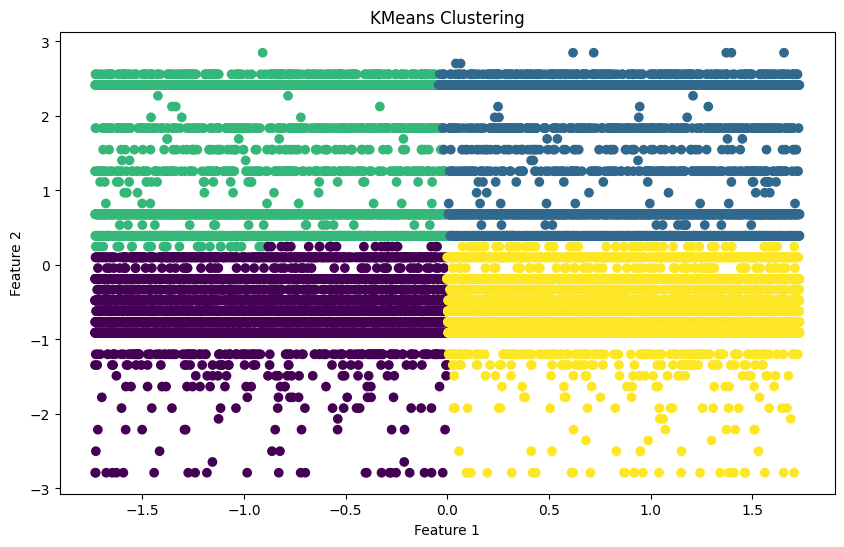

KMeans Cluster 0:
          0         1  KMeans_Cluster
0 -1.731996 -1.343122               0
3 -1.731670 -0.909446               0
4 -1.731561 -0.475771               0


KMeans Cluster 1:
              0         1  KMeans_Cluster
15530 -0.041314  2.415398               1
15537 -0.040552  2.415398               1
15563 -0.037722  2.415398               1


KMeans Cluster 2:
          0         1  KMeans_Cluster
1 -1.731888  1.258931               2
2 -1.731779  0.680697               2
5 -1.731452  2.415398               2


KMeans Cluster 3:
              0         1  KMeans_Cluster
15900 -0.001034 -0.186654               3
15901 -0.000925 -0.186654               3
15906 -0.000381 -0.186654               3




In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Предположим, что X_scaled - это ваши масштабированные данные
# X_scaled = ...

# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Добавьте метки кластеров к вашим данным
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df['KMeans_Cluster'] = y_kmeans

# Визуализация данных с кластерами
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled_df.iloc[:, 0], X_scaled_df.iloc[:, 1], c=y_kmeans, cmap='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Вывод 3 экземпляров каждого кластера
for cluster in range(4):
    cluster_data = X_scaled_df[X_scaled_df['KMeans_Cluster'] == cluster].head(3)
    print(f"KMeans Cluster {cluster}:")
    print(cluster_data)
    print("\n")


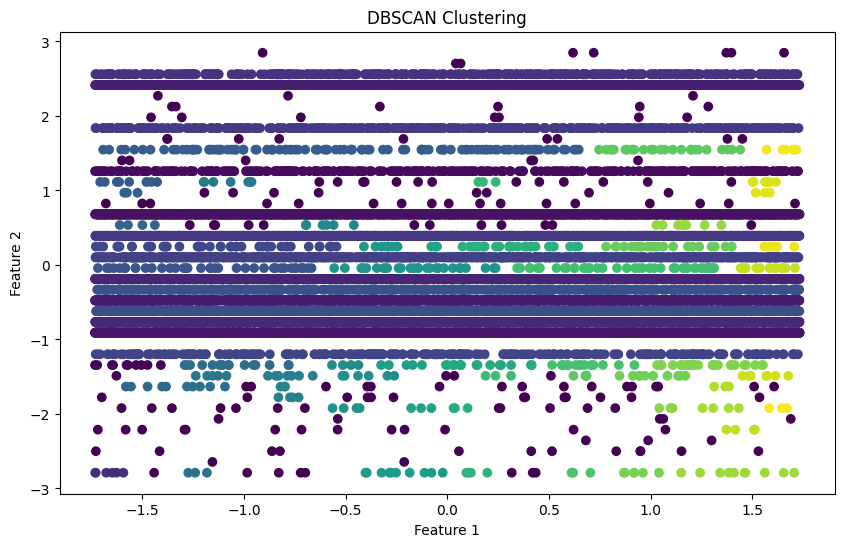

DBSCAN Cluster 0:
            0         1  KMeans_Cluster  DBSCAN_Cluster
0   -1.731996 -1.343122               0               0
100 -1.721110 -1.343122               0               0
764 -1.648823 -1.343122               0               0


DBSCAN Cluster 1:
            0         1  KMeans_Cluster  DBSCAN_Cluster
1   -1.731888  1.258931               2               1
94  -1.721763  1.258931               2               1
126 -1.718279  1.258931               2               1


DBSCAN Cluster 2:
           0         1  KMeans_Cluster  DBSCAN_Cluster
2  -1.731779  0.680697               2               2
18 -1.730037  0.680697               2               2
40 -1.727642  0.680697               2               2


DBSCAN Cluster 3:
          0         1  KMeans_Cluster  DBSCAN_Cluster
3 -1.731670 -0.909446               0               3
6 -1.731343 -0.909446               0               3
8 -1.731125 -0.909446               0               3


DBSCAN Cluster 4:
           0      

In [43]:
from sklearn.cluster import DBSCAN

# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=3)
y_dbscan = dbscan.fit_predict(X_scaled)

# Добавьте метки кластеров к вашим данным
X_scaled_df['DBSCAN_Cluster'] = y_dbscan

# Визуализация данных с кластерами
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled_df.iloc[:, 0], X_scaled_df.iloc[:, 1], c=y_dbscan, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Вывод 3 экземпляров каждого кластера
unique_clusters = X_scaled_df['DBSCAN_Cluster'].unique()
for cluster in unique_clusters:
    if cluster != -1:  # -1 обычно используется для обозначения шума в DBSCAN
        cluster_data = X_scaled_df[X_scaled_df['DBSCAN_Cluster'] == cluster].head(3)
        print(f"DBSCAN Cluster {cluster}:")
        print(cluster_data)
        print("\n")



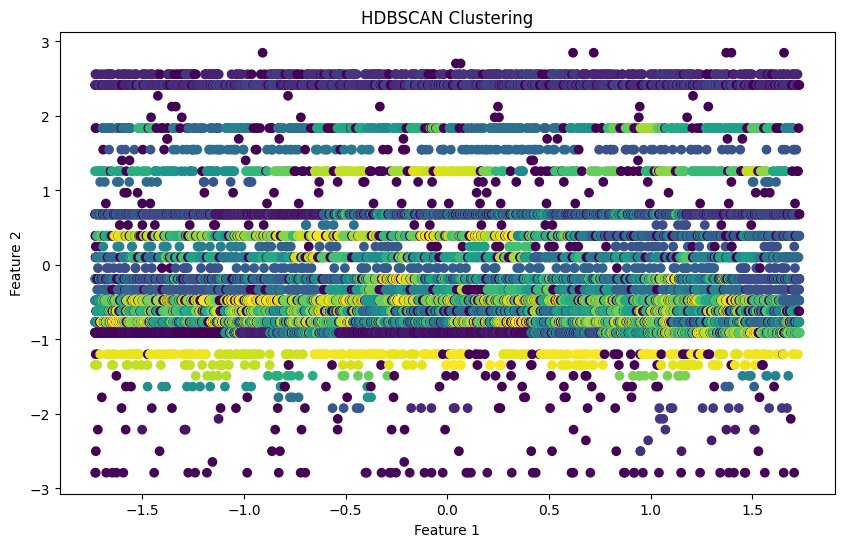

HDBSCAN Cluster 3168:
            0         1  KMeans_Cluster  DBSCAN_Cluster  HDBSCAN_Cluster
0   -1.731996 -1.343122               0               0             3168
100 -1.721110 -1.343122               0               0             3168
764 -1.648823 -1.343122               0               0             3168


HDBSCAN Cluster 2099:
            0         1  KMeans_Cluster  DBSCAN_Cluster  HDBSCAN_Cluster
1   -1.731888  1.258931               2               1             2099
94  -1.721763  1.258931               2               1             2099
126 -1.718279  1.258931               2               1             2099


HDBSCAN Cluster 46:
          0         1  KMeans_Cluster  DBSCAN_Cluster  HDBSCAN_Cluster
3 -1.731670 -0.909446               0               3               46
6 -1.731343 -0.909446               0               3               46
8 -1.731125 -0.909446               0               3               46


HDBSCAN Cluster 1644:
           0         1  KMeans_Cluster  

In [44]:
import hdbscan

# Кластеризация с помощью HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=3)
y_hdbscan = hdbscan_clusterer.fit_predict(X_scaled)

# Добавьте метки кластеров к вашим данным
X_scaled_df['HDBSCAN_Cluster'] = y_hdbscan

# Визуализация данных с кластерами
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled_df.iloc[:, 0], X_scaled_df.iloc[:, 1], c=y_hdbscan, cmap='viridis', marker='o')
plt.title('HDBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Вывод 3 экземпляров каждого кластера
unique_clusters = X_scaled_df['HDBSCAN_Cluster'].unique()
for cluster in unique_clusters:
    if cluster != -1:  # -1 обычно используется для обозначения шума в HDBSCAN
        cluster_data = X_scaled_df[X_scaled_df['HDBSCAN_Cluster'] == cluster].head(3)
        print(f"HDBSCAN Cluster {cluster}:")
        print(cluster_data)
        print("\n")

